In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Using the inspector to print the column names within the 'Measurement' table and its types
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Calculate the date 1 year ago from the last data point in the database
# Latest Date
Latest_Date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(Latest_Date)

('2017-08-23',)


In [12]:
#convert to a datetime format
Latest_Date = dt.date(2017, 8, 23)
#calculate the date one year ago
Year_Ago = Latest_Date - dt.timedelta(days=365)
print(Year_Ago)

2016-08-23


In [13]:
# Perform a query to retrieve the data and precipitation scores
result = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= Year_Ago).statement

# Save the query results as a Pandas DataFrame and set the index to the date column
#conn = engine.connect()
precip_df = pd.read_sql_query(result, session.bind)
precip_df = precip_df.dropna()
precip_df = precip_df.set_index("date")

# Sort the dataframe by date
precip_df = precip_df.sort_values("date")
precip_df.rename(columns = {"prcp" : "precipitation"}, inplace = True)
precip_df


,precipitation
date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15
2016-08-23,1.79
2016-08-24,1.22
2016-08-24,0.08
2016-08-24,2.15


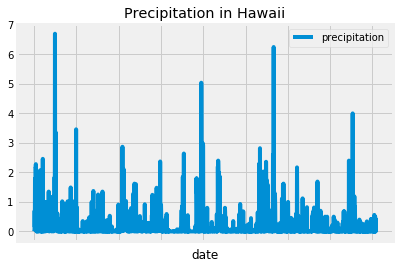

<Figure size 432x288 with 0 Axes>

In [14]:

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(legend=True)
plt.title("Precipitation in Hawaii")
plt.show()
plt.tight_layout()


![precipitation](Images/precipitation.png)

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [16]:
# Design a query to show how many stations are available in this dataset?
# Using the inspector to print the column names within the 'Measurement' table and its types
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [17]:
#count the number of stations
result = session.query(Station.name).count()
result

9

In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
results = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
results

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
results = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()
results

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 1.0, 'Temperature in Hawaii')

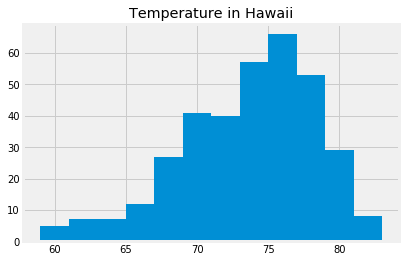

In [20]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= Year_Ago).filter(Measurement.station == "USC00519281").statement
temp_pd = pd.read_sql_query(results, session.bind)
temp_pd

temp_pd.hist(bins=12)
plt.title("Temperature in Hawaii")

In [21]:
# Step 2 of the Climate Homework - also included in a separate file called app.py 
#because I couldn't figure out how to get it to open a website when it was in a jupyter notebook

#import modules
from flask import Flask, jsonify

#flask setup
app = Flask(__name__)

In [22]:
#* `/`
#Home page.
#List all routes that are available.

@app.route("/")
def welcome():
    return (
        f"Welcome to the Hawaii Climate API!<br/>"
        f"Available Routes:<br/>"
        f"/api/v1.0/precipitation"
        f"/api/v1.0/stations"
        f"/api/v1.0/tobs"
        f"/api/v1.0/<start_date>"
        f"/api/v1.0/<start_date>/<end_date>"
    )

In [23]:
#Convert the query results to a Dictionary using date as the key and prcp as the value.
#Return the JSON representation of your dictionary.

@app.route("/api/v1.0/precipitation")
def precipitation():
    results = session.query(Measurement.date, Measurement.prcp).all()
    precipitation = []
    for date, prcp in results:
        precip_dict = {}
        precip_dict["date"] = date
        precip_dict["precip"] = precip
        precipitation.append(precip_dict)

    return jsonify(precipitation)
    

In [35]:
#Return a JSON list of stations from the dataset.

@app.route("/api/v1.0/stations")
def station():
    results = session.query(Station.name).all()
    all_names = list(np.ravel(results))

    return jsonify(all_names)

AssertionError: View function mapping is overwriting an existing endpoint function: station

In [25]:
#query for the dates and temperature observations from a year from the last data point.
#Return a JSON list of Temperature Observations (tobs) for the previous year.

@app.route("/api/v1.0/tobs")
def temp():
    results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= Year_Ago).all()
    temp = []
    for date, tobs in results:
        precip_dict = {}
        precip_dict["date"] = date
        precip_dict["tops"] = temp
        temp.append(temp_dict)

    return jsonify(temp)

In [26]:
#Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start 
#or start-end range.  When given the start only, calculate TMIN, TAVG, and TMAX for all dates greater than and equal 
#to the start date.  When given the start and the end date, calculate the TMIN, TAVG, and TMAX for dates between the 
#start and end date inclusive.

@app.route("/api/v1.0/<start_date>")
def start_temp():
    start_date = "+ start_date +"
    results = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).filter(Measurement.date >= start_date).all()
    return jsonify(results)

@app.route("/api/v1.0/<start_date>/<end_date>")
def start_end_temp():
    start_date = "+ start_date +"
    end_date = "+ end_date +"
    results = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
    return jsonify(results)

![precipitation](Images/station-histogram.png)

In [27]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [28]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [29]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [30]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [31]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [32]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [33]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [34]:
# Plot the daily normals as an area plot with `stacked=False`
